In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns


In [144]:
data = pd.read_csv('../data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [145]:
# check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

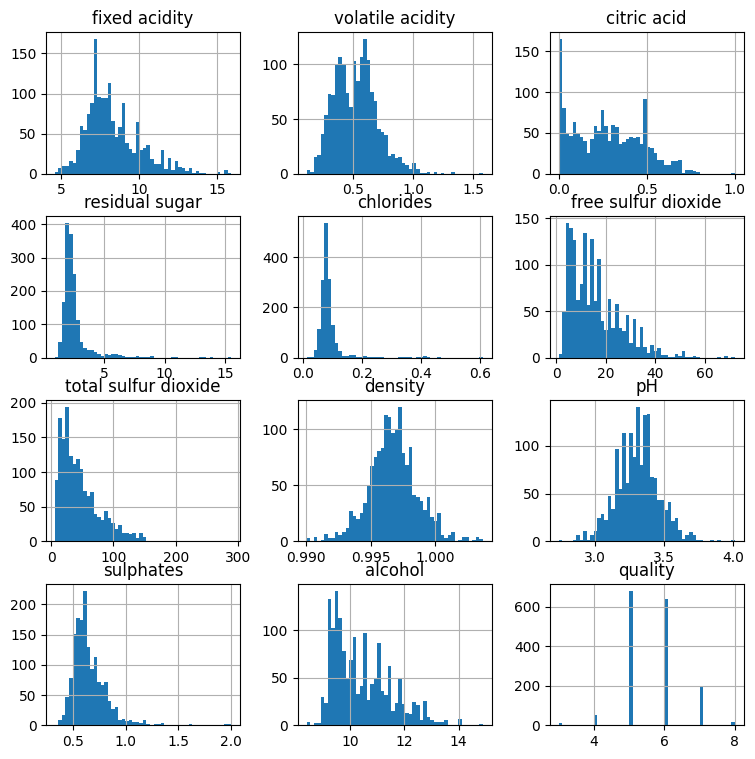

In [146]:
# plot histogram for data
data.hist(bins=50, figsize=(9, 9))

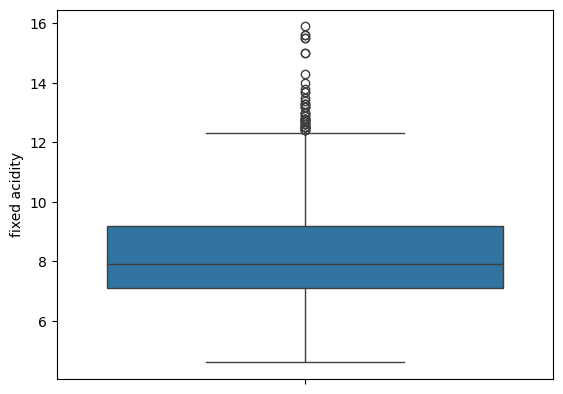

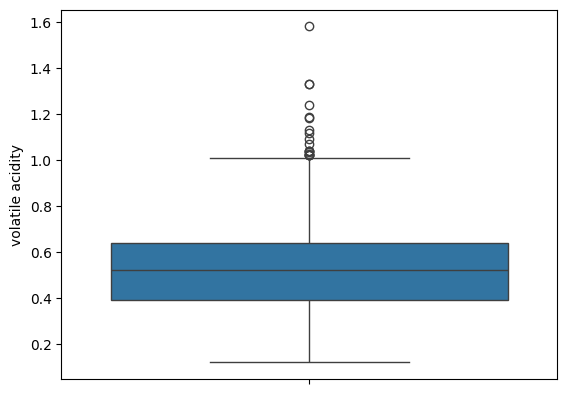

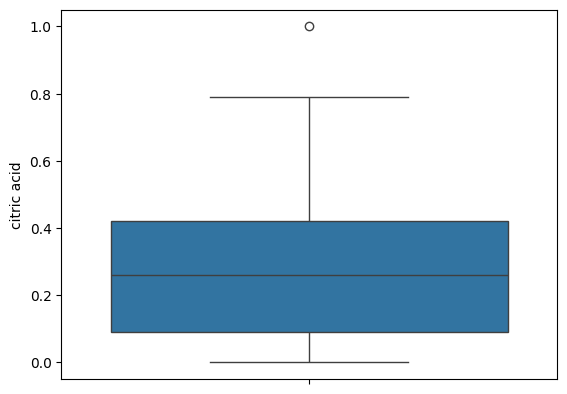

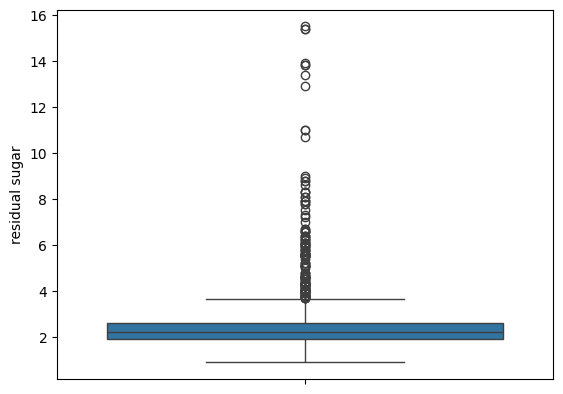

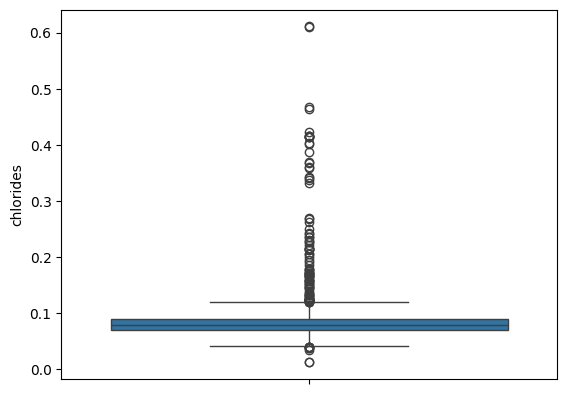

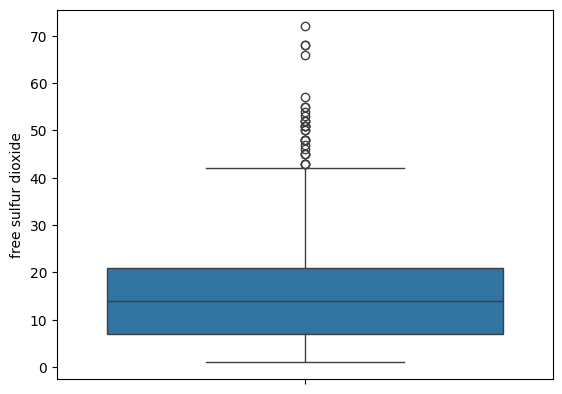

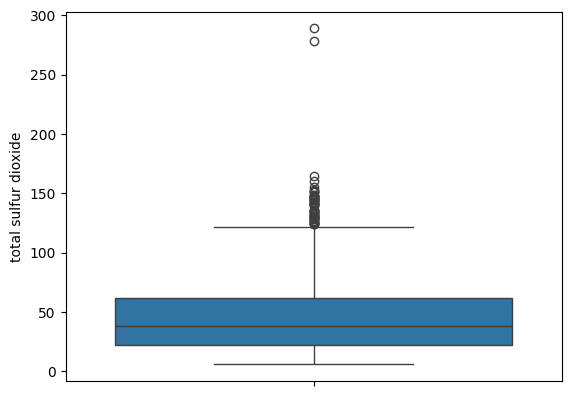

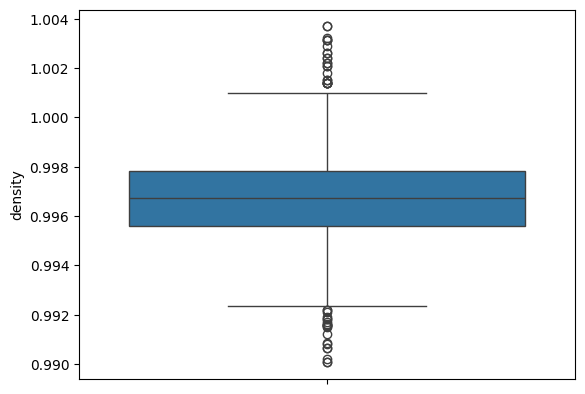

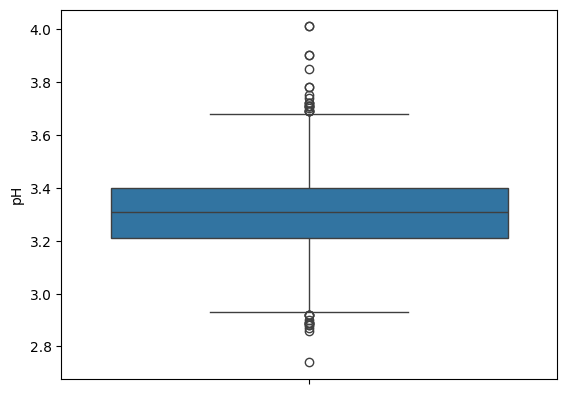

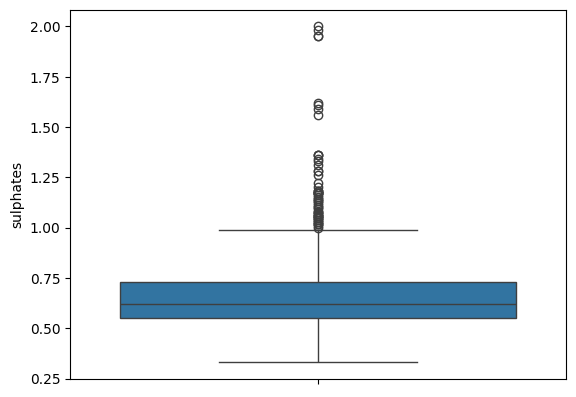

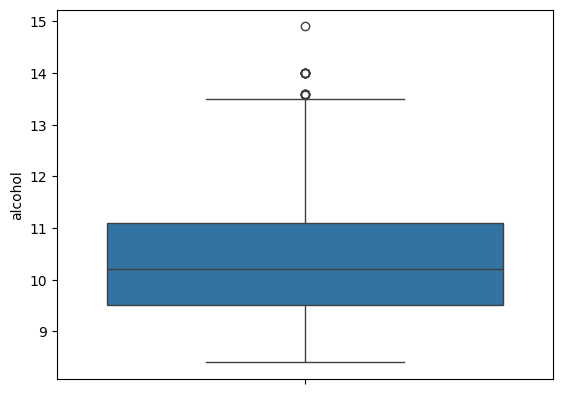

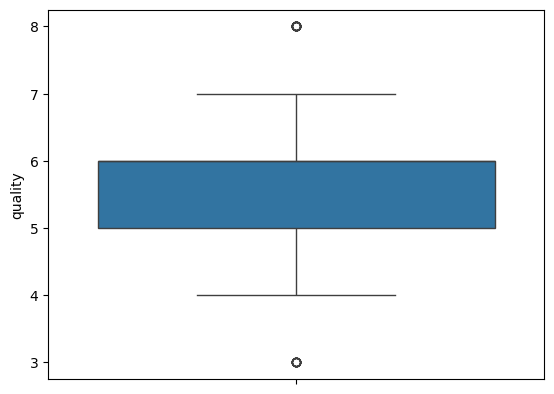

In [147]:
for var in data.columns:
    plt.figure()
    sns.boxplot(data[var])

In [148]:
#remove outliers 
# len(data[data['total sulfur dioxide'] > 150])
data = data[data['total sulfur dioxide'] <= 150].reset_index(drop=True)

<Axes: >

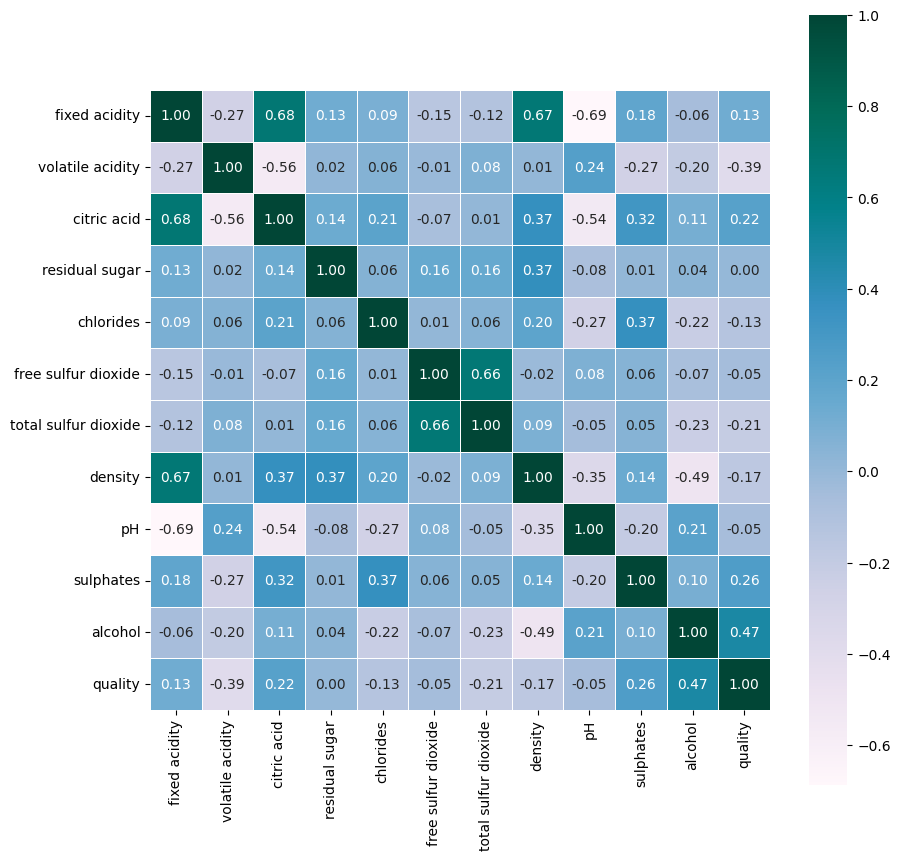

In [149]:
corrs = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrs, annot=True, cmap='PuBuGn', fmt=".2f", square=True, linewidths=0.5)

In [150]:
# remove pH and density as it has high correlations with the data

data = data.drop(['pH', 'density'], axis=1)

In [151]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5


In [152]:
data.groupby('quality')['quality'].count() / len(data)

quality
3    0.006289
4    0.033333
5    0.425157
6    0.400000
7    0.123899
8    0.011321
Name: quality, dtype: float64

In [153]:
#since there are a small number 3,4 qualities, we will group them together for a binary prediction
data["good"] = np.where(data["quality"] >= 7, 1, 0)
data = data.drop("quality", axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,0


In [154]:
data.groupby("good")["good"].count() / len(data)

good
0    0.86478
1    0.13522
Name: good, dtype: float64

In [155]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('good', axis=1), data['good'], test_size=0.1, random_state=0, stratify=data["good"])

In [156]:
# test train and test data distributions
print(y_train.value_counts() / len(y_train))
y_test.value_counts() / len(y_test)

good
0    0.86443
1    0.13557
Name: count, dtype: float64


good
0    0.867925
1    0.132075
Name: count, dtype: float64

In [157]:
scaler = StandardScaler()

scaler.fit(x_train)

scaled_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
scaled_test = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)

scaled_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.773501,-1.155577,1.377721,-0.020843,0.141645,1.229206,1.219960,1.038601,-0.764699
1,-0.015276,0.457965,0.151175,-0.307974,-0.072755,-0.446073,0.149557,-0.280099,-0.206533
2,-0.296983,-1.044298,0.508918,-0.379757,-0.115636,0.835022,0.409049,-0.405690,-0.950754
3,0.153747,-0.877380,1.939888,2.778692,-0.158516,-1.234439,-1.212775,-0.468485,0.537688
4,0.322771,-0.265347,1.326615,1.055901,0.291726,-1.234439,-1.147902,-0.405690,1.560992


In [158]:
#save the files 

scaled_train.to_csv('../data/xtrain.csv', index=False)
scaled_test.to_csv('../data/xtest.csv', index=False)

y_train.to_csv('../data/ytrain.csv', index=False)
y_test.to_csv('../data/ytest.csv', index=False)

In [159]:
joblib.dump(scaler, 'standard_scaler.joblib') 

['standard_scaler.joblib']